In [13]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot
%matplotlib inline

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
test_data = test_data.drop("index",axis=1)
data = pd.concat([train_data,test_data],sort=False)

In [5]:
description = data["description"]

In [6]:
description.head()

0    This is a fine rich balanced wine. It has ripe...
1    A solid, chunky wine, with a structure that is...
2    This is powerful and concentrated, with the hi...
3    Rich, ripe and oaky, this Petite Sirah charms ...
4    This wine is a unique in the state blend and f...
Name: description, dtype: object

In [7]:
text = [x.lower().split() for x in description]

In [ ]:
text

In [ ]:
len(s.split())

In [3]:
from gensim.models.word2vec import Word2Vec

In [9]:
model_1 = Word2Vec.load("word2vec.model")

In [ ]:
from gensim.models import KeyedVectors

model_2 = Word2Vec(size=300, min_count=1)
model_2.build_vocab(text)
total_examples = model_2.corpus_count
model = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)
model_2.build_vocab([list(model.vocab.keys())], update=True)
model_2.intersect_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)
model_2.train(text, total_examples=total_examples, epochs=model_2.iter)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


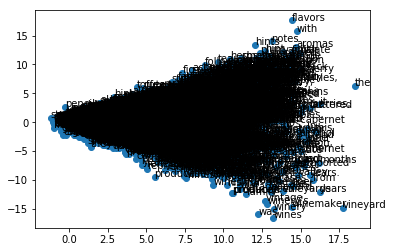

In [12]:
# fit a 2d PCA model to the vectors
X = model_2[model_1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model_1.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [14]:
model_2.save("updated_google_corpus")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

In [ ]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

In [ ]:
display_closestwords_tsnescatterplot(model, "bad")

In [ ]:
model.save("word2vec.model")